# Visualizing Categorical Data

## Imports

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Introduction to categorical plots using Seaborn

### Creating a box plot

In [4]:
reviews = pd.read_csv('../data/reviews.csv')

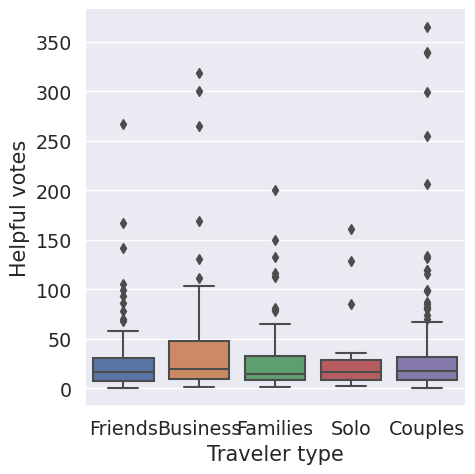

In [7]:
# Set the font size to 1.25
sns.set(font_scale=1.25)

# Set the background to "darkgrid"
sns.set_style('darkgrid')

# Create a boxplot
sns.catplot(
    data=reviews,
    x='Traveler type',
    y='Helpful votes',
    kind='box'
)

plt.show()

## Seaborn bar plots

### Creating a bar plot

Period of stay
Mar-May    128
Jun-Aug    126
Sep-Nov    126
Dec-Feb    124
Name: count, dtype: int64


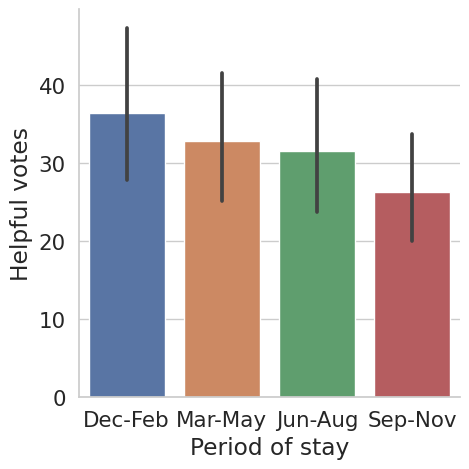

In [8]:
# Print the frequency counts of "Period of stay"
print(reviews['Period of stay'].value_counts())

sns.set(font_scale=1.4)
sns.set_style("whitegrid")

# Create a bar plot of "Helpful votes" by "Period of stay"
sns.catplot(data=reviews, x='Period of stay', y='Helpful votes', kind='bar')
plt.show()

### Ordering categories

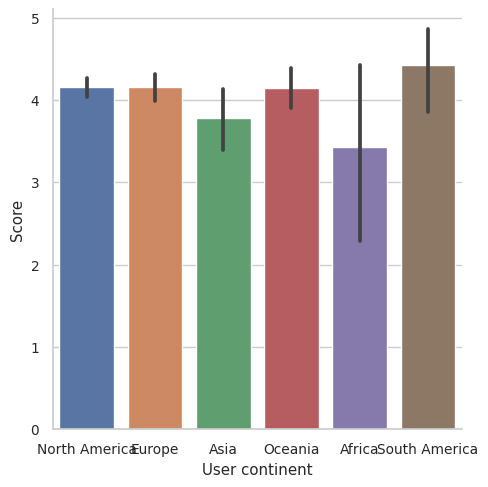

User continent
North America    295
Europe           118
Oceania           41
Asia              36
Africa             7
South America      7
Name: count, dtype: int64


In [10]:
# Create a bar chart
sns.set(font_scale=.9)
sns.set_style("whitegrid")
sns.catplot(x='User continent', y='Score', data=reviews, kind='bar')
plt.show()

# Print the frequency counts for "User continent"
print(reviews['User continent'].value_counts())

User continent
North America    295
Europe           118
Oceania           41
Asia              36
Africa             7
South America      7
Name: count, dtype: int64


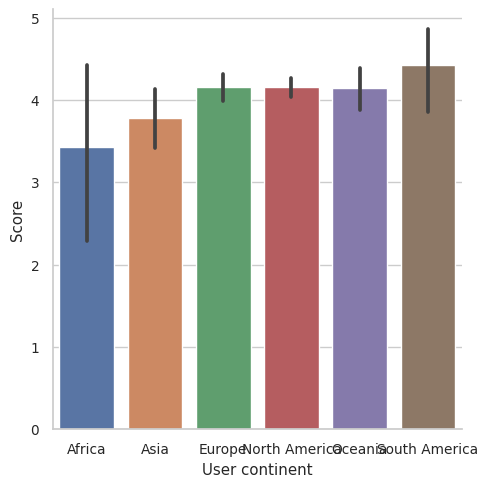

In [11]:
# Set style
sns.set(font_scale=.9)
sns.set_style("whitegrid")

# Print the frequency counts for "User continent"
print(reviews["User continent"].value_counts())

# Convert "User continent" to a categorical variable
reviews["User continent"] = reviews["User continent"].astype('category')
sns.catplot(x='User continent', y="Score", data=reviews, kind="bar")
plt.show()

User continent
North America    295
Europe           118
Oceania           41
Asia              36
Africa             7
South America      7
Name: count, dtype: int64


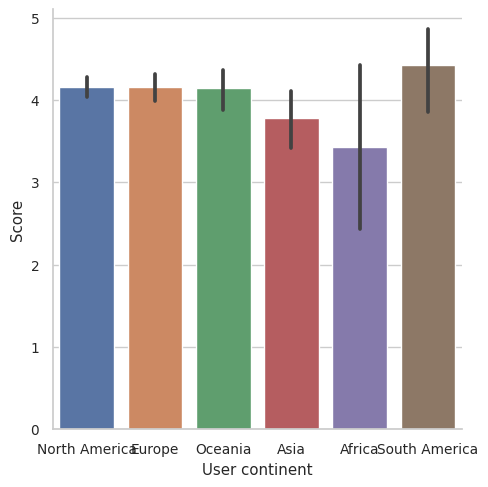

In [13]:
# Set style
sns.set(font_scale=.9)
sns.set_style("whitegrid")

# Print the frequency counts for "User continent"
print(reviews["User continent"].value_counts())

# Convert "User continent" to a categorical variable
reviews["User continent"] = reviews["User continent"].astype("category")

# Reorder "User continent" using continent_categories and rerun the graphic
continent_categories = list(reviews["User continent"].value_counts().index)
reviews["User continent"] = reviews["User continent"].cat.reorder_categories(new_categories=continent_categories)
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar")
plt.show()

### Bar plot using hue

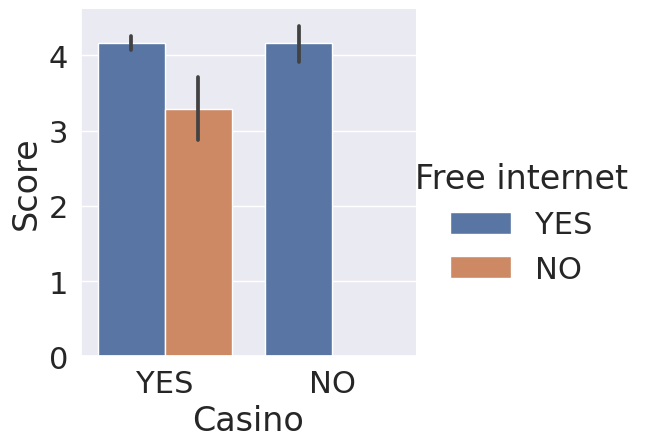

In [14]:
# Add a second category to split the data on: "Free internet"
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x='Casino', y="Score", data=reviews, kind="bar", hue='Free internet')
plt.show()

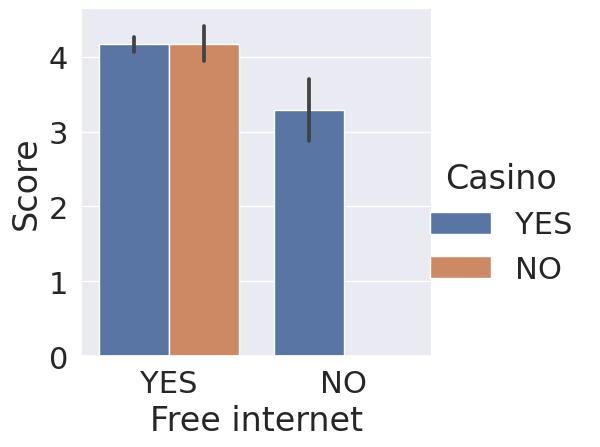

In [15]:
# Switch the x and hue categories
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x='Free internet', y="Score", data=reviews, kind="bar", hue='Casino')
plt.show()

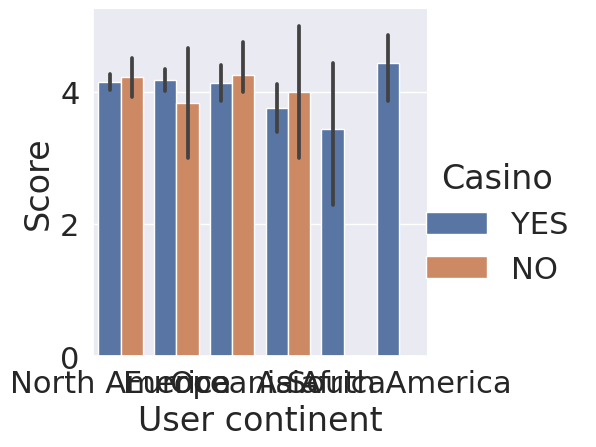

In [16]:
# Update x to be "User continent"
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x='User continent', y="Score", data=reviews, kind="bar", hue="Casino")
plt.show()

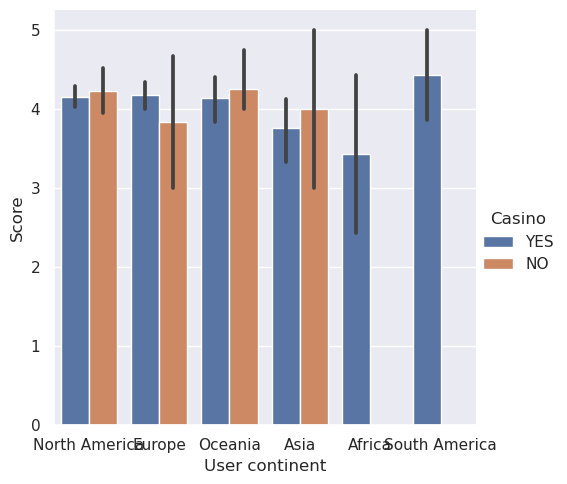

In [17]:
# Lower the font size so that all text fits on the screen.
sns.set(font_scale=1)
sns.set_style("darkgrid")
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar", hue="Casino")
plt.show()

## Point and count plots

### Creating a point plot

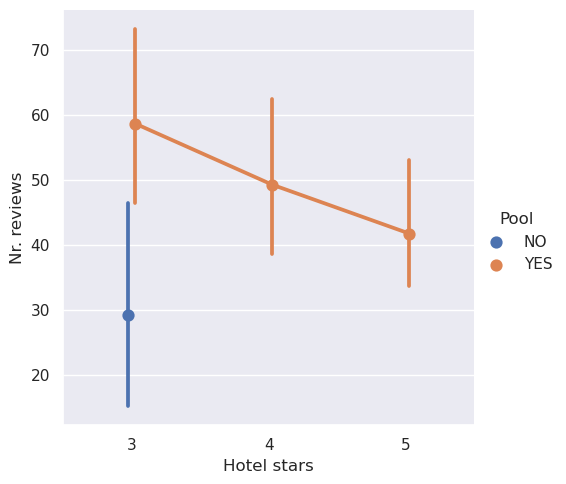

In [19]:
# Create a point plot with catplot using "Hotel stars" and "Nr. reviews"
sns.catplot(
  # Split the data across Hotel stars and summarize Nr. reviews
  x='Hotel stars',
  y='Nr. reviews',
  data=reviews,
  # Specify a point plot
  kind='point',
  hue="Pool",
  # Make sure the lines and points don't overlap
  dodge=True
)
plt.show()

### Creating a count plot

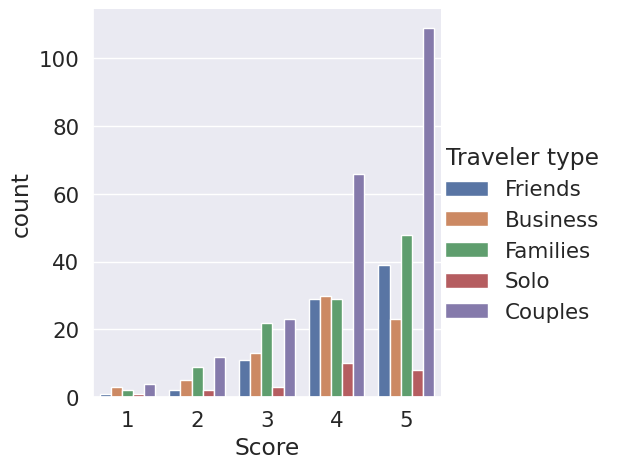

In [21]:
sns.set(font_scale=1.4)
sns.set_style("darkgrid")

# Create a catplot that will count the frequency of "Score" across "Traveler type"
sns.catplot(
    data=reviews,
    x='Score',
    hue='Traveler type',
    kind='count'
)
plt.show()

## Additional catplot() options

### One visualization per group

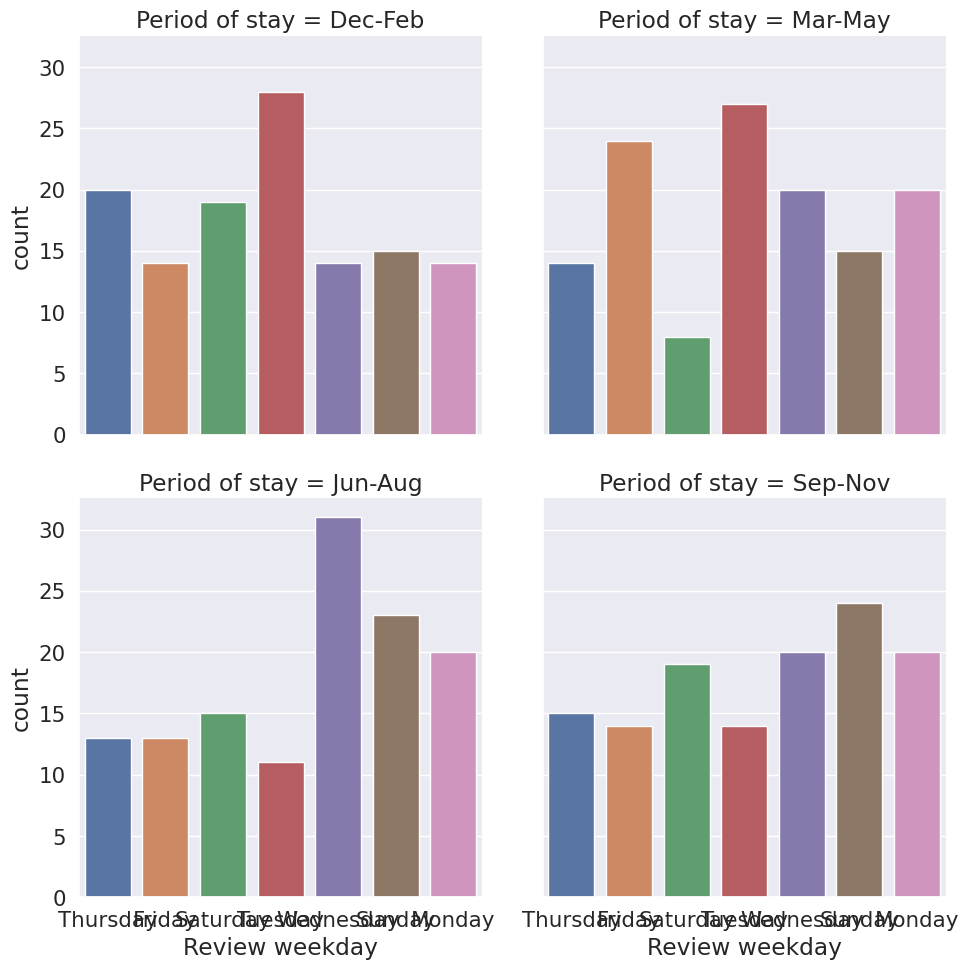

In [22]:
# Create a catplot for each "Period of stay" broken down by "Review weekday"
ax = sns.catplot(
  # Make sure Review weekday is along the x-axis
  x='Review weekday',
  # Specify Period of stay as the column to create individual graphics for
  col='Period of stay',
  # Specify that a count plot should be created
  kind='count',
  # Wrap the plots after every 2nd graphic.
  col_wrap=2,
  data=reviews
)
plt.show()

### Updating categorical plots

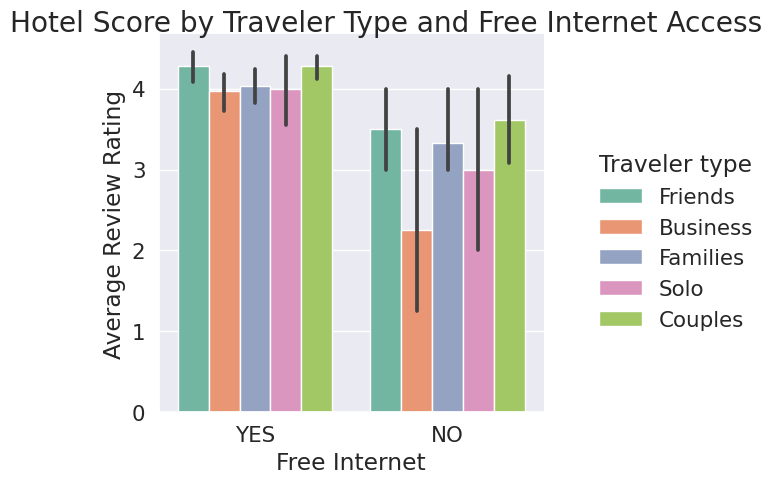

In [27]:
# Adjust the color
ax = sns.catplot(
  x="Free internet", y="Score",
  hue="Traveler type", kind="bar",
  data=reviews,
  palette=sns.color_palette('Set2')
)

# Add a title
ax.fig.suptitle('Hotel Score by Traveler Type and Free Internet Access')

# Update the axis labels
ax.set_axis_labels('Free Internet', 'Average Review Rating')

# Adjust the starting height of the graphic
plt.subplots_adjust(top=.93)
plt.show()